# Advanced Visualization with Matplotlib



When plotting graphs, it is necessary to use an object-oriented approach (setting a graph through the Figure and Axes objects) wherever possible. All graphs must have a title and axis labels. Make sure that all labels and labels of the axes are legible and do not overlap each other and graphs. When building several graphs, there must be a legend in the same coordinate axes.

#### Data Description

To complete your homework, you must use the `vgsales.csv` dataset, the download of which will be given below. This dataset contains information about the total sales of video games for video game consoles. Description of signs:
* `Rank` - the sequence number of the record in the dataset
* `Name` - game name
* `Platform` - the platform for which the game was released (Nintendo, PlayStation, XBox, etc.)
* `Year` - game release year
* `Genre` - game genre
* `Publisher` - the name of the game publisher
* `NA_Sales` - sales of the game in North America, million copies
* `EU_Sales` - sales of the game in Europe, million copies
* `JP_Sales` - sales of the game in Japan, million copies
* `Other_Sales` - sales of the game in other countries, million copies
* `Global_Sales` - game sales worldwide, million copies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###  1

Plot a line graph for the sales of all sports games in Japan over time. Set the graphic to 12 by 6


Text(0, 0.5, 'Sales of all games in Japan, million copies')

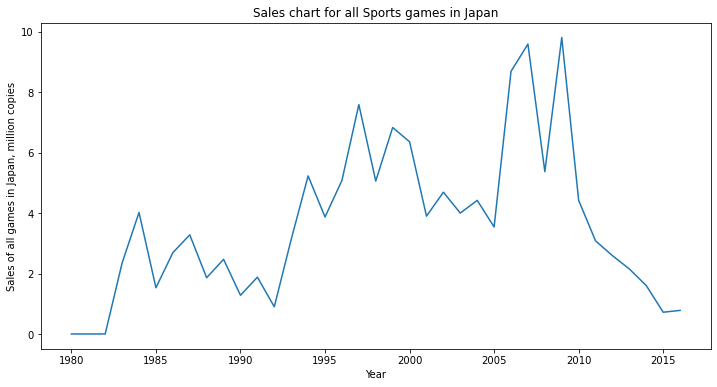

In [4]:
series = df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(series)
ax.set_title('Sales chart for all Sports games in Japan')
ax.set_xlabel('Year')
ax.set_ylabel('Sales of all games in Japan, million copies')

###  2

Plot line charts of Activision sales in North America, Europe, Japan, and the world on the same coordinate axes


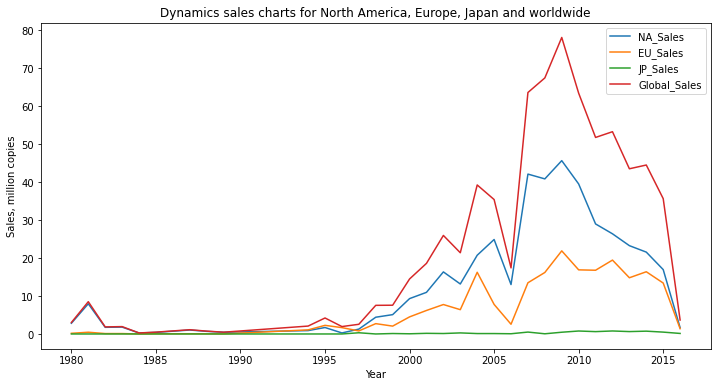

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
ser_NA = df[df['Publisher'] == 'Activision'].groupby('Year')['NA_Sales'].sum()
ser_EU = df[df['Publisher'] == 'Activision'].groupby('Year')['EU_Sales'].sum()
ser_JP = df[df['Publisher'] == 'Activision'].groupby('Year')['JP_Sales'].sum()
ser_Global = df[df['Publisher'] == 'Activision'].groupby('Year')['Global_Sales'].sum()

ax.plot(ser_NA, label='NA_Sales')
ax.plot(ser_EU, label='EU_Sales')
ax.plot(ser_JP, label='JP_Sales')
ax.plot(ser_Global, label='Global_Sales')
ax.set_title('Dynamics sales charts for North America, Europe, Japan and worldwide')
ax.set_xlabel('Year')
ax.set_ylabel('Sales, million copies')
ax.legend()

###  3

In a loop (i.e. on different coordinate axes), build line graphs of Activision's sales dynamics in North America, Europe, Japan and the world


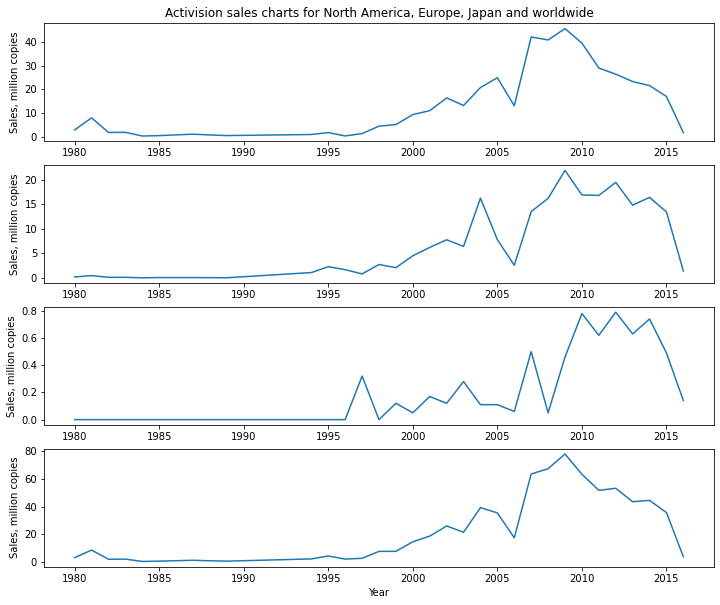

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,10))

ser_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i, el in enumerate(ser_list):
    data = df[df['Publisher'] == 'Activision'].groupby('Year')[el].sum()
    axs[i].plot(data)
    axs[i].set_ylabel('Sales, million copies')
    axs[-1].set_xlabel('Year')
    axs[0].set_title('Activision sales charts for North America, Europe, Japan and worldwide')
    

###  4

Plot the same line charts for Activision sales in North America, Europe, Japan, and worldwide on the same canvas in a 2 by 2 grid. Make the final canvas 12 by 12 in size. All graphs should separate the X and Y axes


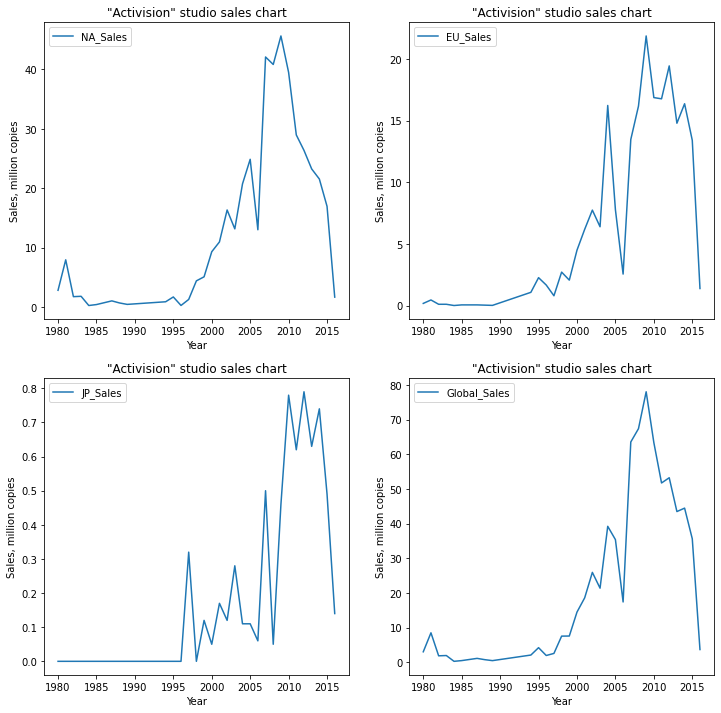

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

ser_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
ax = axs.ravel()
for ind, elem in enumerate(ser_list):
    data1 = df[df['Publisher'] == 'Activision'].groupby('Year')[elem].sum()
    ax[ind].plot(data1, label=elem)
    ax[ind].set_title('"Activision" studio sales chart')
    ax[ind].legend()
    ax[ind].set_ylabel('Sales, million copies')
    ax[ind].set_xlabel('Year')



###  5

On the same grid, plot 2 histograms of the distribution of worldwide game sales by publishers Microsoft Game Studios and Take-Two Interactive after 2010 (including 2010). Make charts translucent, cutoffs should be common and correspond to the width of the columns of both charts


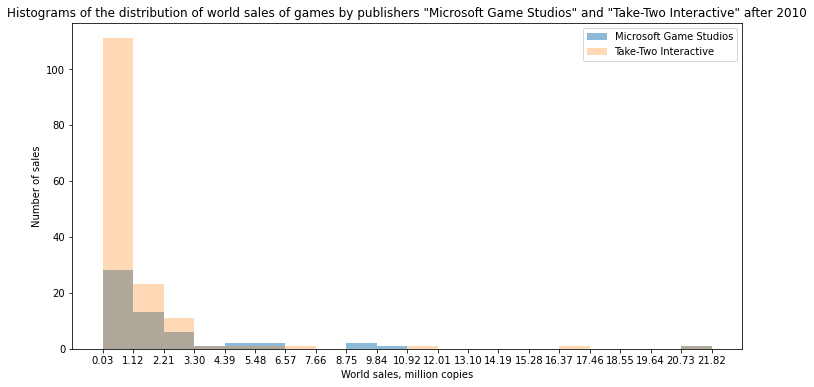

In [8]:
series2 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Global_Sales']
series3 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Global_Sales']

fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(series2, label='Microsoft Game Studios', alpha=0.5, bins=20)
ax.hist(series3, label='Take-Two Interactive', alpha=0.3, bins=bins)
ax.set_xticks(bins)
ax.set_xlabel('World sales, million copies')
ax.set_ylabel('Number of sales')
ax.set_title('Histograms of the distribution of world sales of games by publishers "Microsoft Game Studios" and "Take-Two Interactive" after 2010')
ax.legend()



###  6

Identify the top 5 platforms that have sold the most games in Japan of all time. Illustrate the value of sales on a bar chart, color the bar with the highest value in green and the bar with the lowest value in red


   Platform  JP_Sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
11      NES     98.65


Text(0.5, 1.0, 'Distribution diagram of publishers with the highest game sales in Japan')

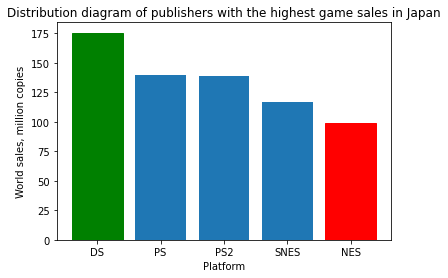

In [9]:
series4 = df.groupby('Platform')['JP_Sales'].sum().reset_index()
series4 = series4.sort_values('JP_Sales', ascending=False).head()
print(series4)

fig, ax = plt.subplots()
bar_jp = ax.bar(series4['Platform'], series4['JP_Sales'])
bar_jp[0].set_color('green')
bar_jp[-1].set_color('red')
ax.set_xlabel('Platform')
ax.set_ylabel('World sales, million copies')
ax.set_title('Distribution diagram of publishers with the highest game sales in Japan')

## Additional tasks


### 7

Plot a line graph of the evolution of the number of games released by Nintendo over the years. Use numpy or pandas to determine the period in which the publisher released more than 35 games each year, and highlight this period of time with a green translucent rectangle


      Year  Name
0   1983.0     6
1   1984.0     9
2   1985.0     7
3   1986.0     6
4   1987.0     4
5   1988.0     6
6   1989.0     9
7   1990.0     7
8   1991.0    13
9   1992.0    10
10  1993.0     9
11  1994.0     8
12  1995.0    10
13  1996.0    17
14  1997.0    13
15  1998.0    17
16  1999.0    20
17  2000.0    23
18  2001.0    22
19  2002.0    22
20  2003.0    27
21  2004.0    57
22  2005.0    45
23  2006.0    53
24  2007.0    42
25  2008.0    32
26  2009.0    32
27  2010.0    28
28  2011.0    26
29  2012.0    31
30  2013.0    23
31  2014.0    20
32  2015.0    32
33  2016.0    10


Text(0.5, 1.0, 'Graph of the dynamics of the number of games released by Nintendo, by year')

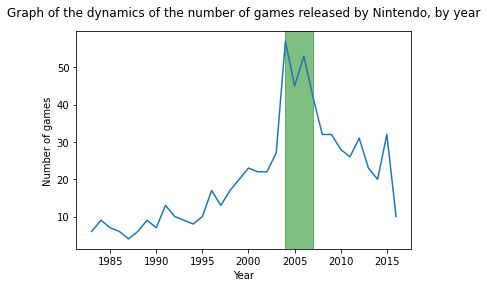

In [10]:
series5 = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Name'].count().reset_index()
x_min = series5[series5['Name'] > 35]['Year'].min()
x_max = series5[series5['Name'] > 35]['Year'].max()
print(series5)

fig, ax = plt.subplots()
ax.plot(series5['Year'], series5['Name'])
ax.axvspan(xmin=x_min, xmax=x_max, color='green', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Number of games')
ax.set_title('Graph of the dynamics of the number of games released by Nintendo, by year', pad=15)

###  8

Identify the 3 genres and 4 publishers with the biggest game sales in the world of all time. Plot a 4-by-3 grid of graphs, in each cell plot a scatter plot that tests the relationship between global sales and North American sales for each pair (genre, publisher). Determine the size of the final canvas yourself so that all graphs are visible


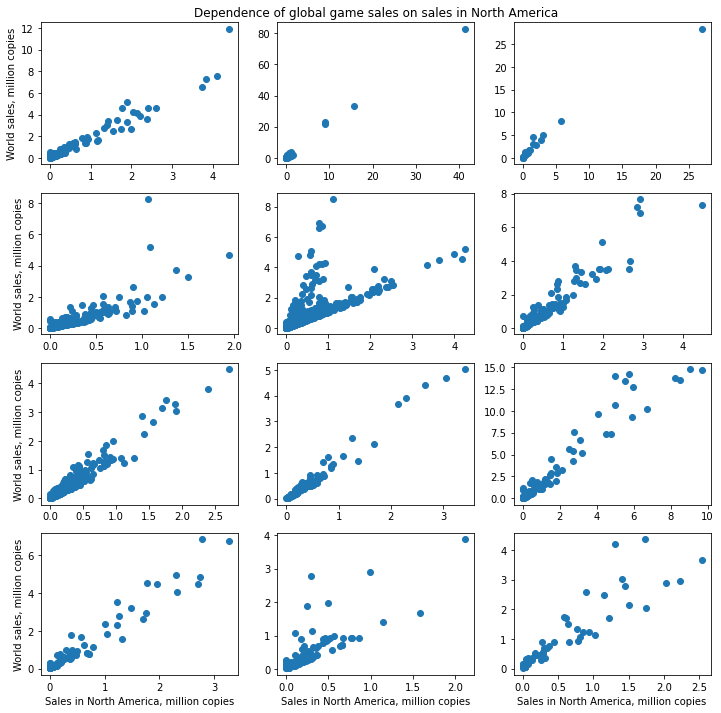

In [11]:
genres_list = ['Action', 'Sports', 'Shooter']
publishers_list = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment']

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12,12))
for i, pub in enumerate(publishers_list):
    for j, genre in enumerate(genres_list):
        data_GL = df[(df['Genre'] == genre) & (df['Publisher'] == pub)]['Global_Sales'].reset_index()
        dataNA = df[(df['Genre'] == genre) & (df['Publisher'] == pub)]['NA_Sales'].reset_index()
        data_GL['NA_Sales'] = dataNA['NA_Sales']
        axs[i][j].scatter(data_GL['NA_Sales'], data_GL['Global_Sales'])
        if i == len(publishers_list) - 1:
            x_label = 'Sales in North America, million copies'
            axs[i][j].set_xlabel(x_label)
        elif i == 0:
            title = 'Dependence of global sales on sales in North America'
            axs[i][1].set_title('Dependence of global game sales on sales in North America')            
        if j == 0:
            y_label = 'World sales, million copies'
            axs[i][j].set_ylabel(y_label)
